In [96]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="darkgrid")

# Data Processing

In [98]:
"""
Attribute Information: 
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient
"""
data = pd.read_csv('./healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [100]:
"""find out and re-fill the missing value"""
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [101]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [102]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [103]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [104]:
"""drop 'id' col"""
data = data.drop(columns=['id'],axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Data Visuliazation

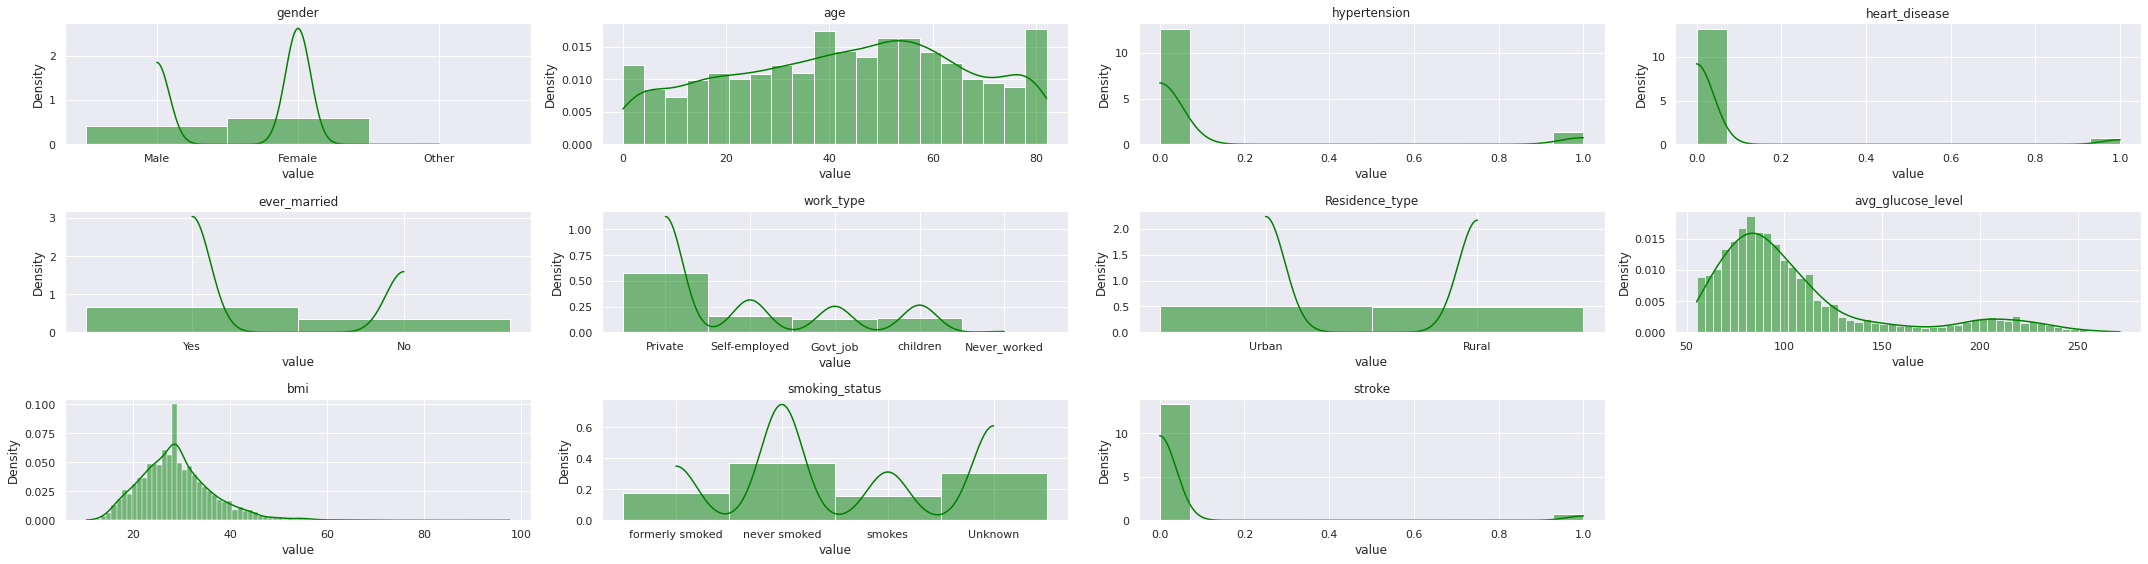

In [106]:
"""
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
"""
plt.figure(figsize=(30,8))
for index, col_name in enumerate(data.columns.values):
    ax_sub = plt.subplot(3,4,index+1)
    ax = sns.histplot(data=data[col_name],kde=True, color='green', stat='density')
    ax.set_title(col_name)
    ax.set_xlabel('value')
plt.tight_layout()
plt.show()

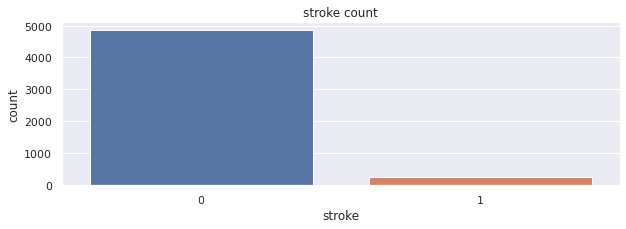

In [107]:
"""stroke count plot"""
plt.figure(figsize=(10,3))
sns.countplot(data=data, x='stroke')
plt.title("stroke count")
plt.show()

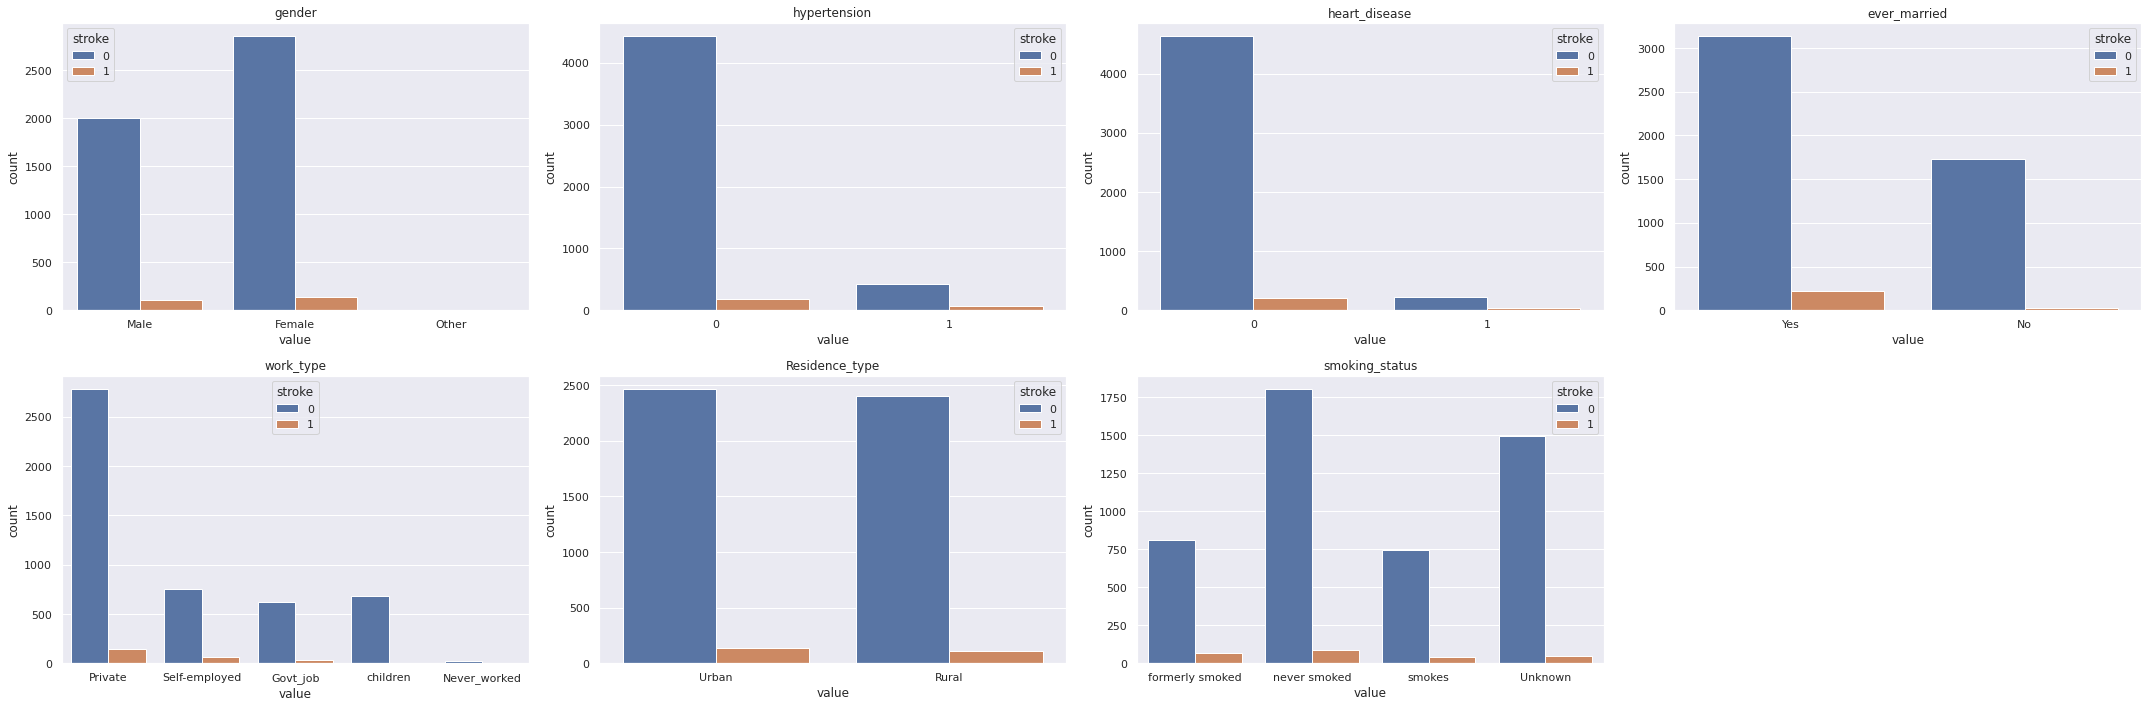

In [108]:
"""stroke v.s. categorial data"""
cat_lst=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
plt.figure(figsize=(30,10))
for index, cat_name in enumerate(cat_lst):
    ax_sub = plt.subplot(2,4,index+1)
    ax = sns.countplot(data=data, x=cat_name, hue='stroke')
    ax.set_title(cat_name)
    ax.set_xlabel('value')
plt.tight_layout()
plt.show()    

In [109]:
data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


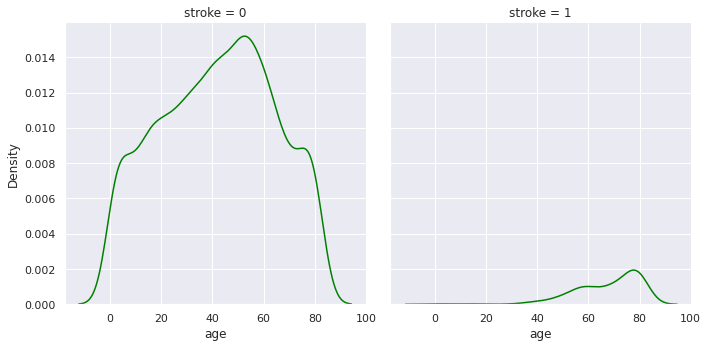

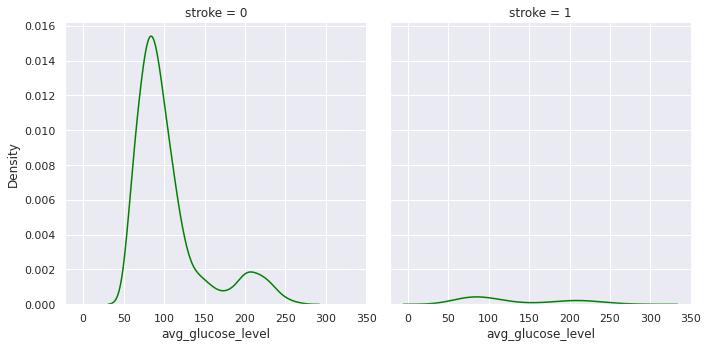

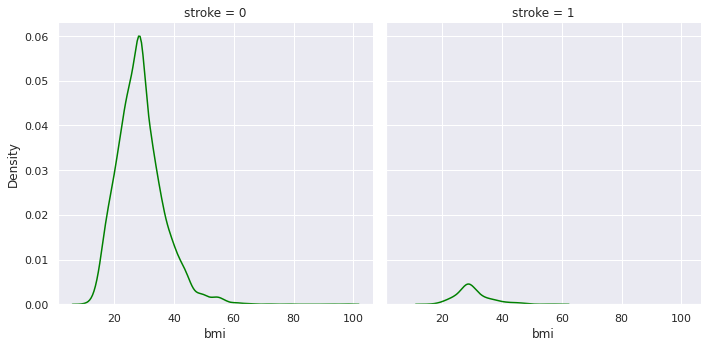

In [110]:
"""stroke v.s. continuous data"""
con_lst=['age','avg_glucose_level','bmi']
for index, attr_name in enumerate(con_lst):
    sns.displot(data=data, x=attr_name,col='stroke', kind='kde',color='green')

In [111]:
"""replace object to numeric values"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [112]:
"""
gender => 'Male':0,'Female':1,'Other':-1
ever_married => 'Yes':1, 'No':0
Residence_type => 'Rural':0,'Urban':1
smoking_status => 'never smoked':0, 'formerly smoked':1, 'smokes':2, 'Unknown':-1
work_type => 'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2
"""
data['gender'] = data['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
data['ever_married']=data['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
data['Residence_type'] = data['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
data['smoking_status'] = data['smoking_status'].replace({'never smoked':0, 'formerly smoked':1, 'smokes':2, 'Unknown':-1})
data['work_type'] = data['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

In [113]:
data.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.600000,1,1
1,1,61.0,0,0,1,1,0,202.21,28.893237,0,1
2,0,80.0,0,1,1,0,0,105.92,32.500000,0,1


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   uint8  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   uint8  
 5   work_type          5110 non-null   uint8  
 6   Residence_type     5110 non-null   uint8  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), uint8(4)
memory usage: 299.5 KB


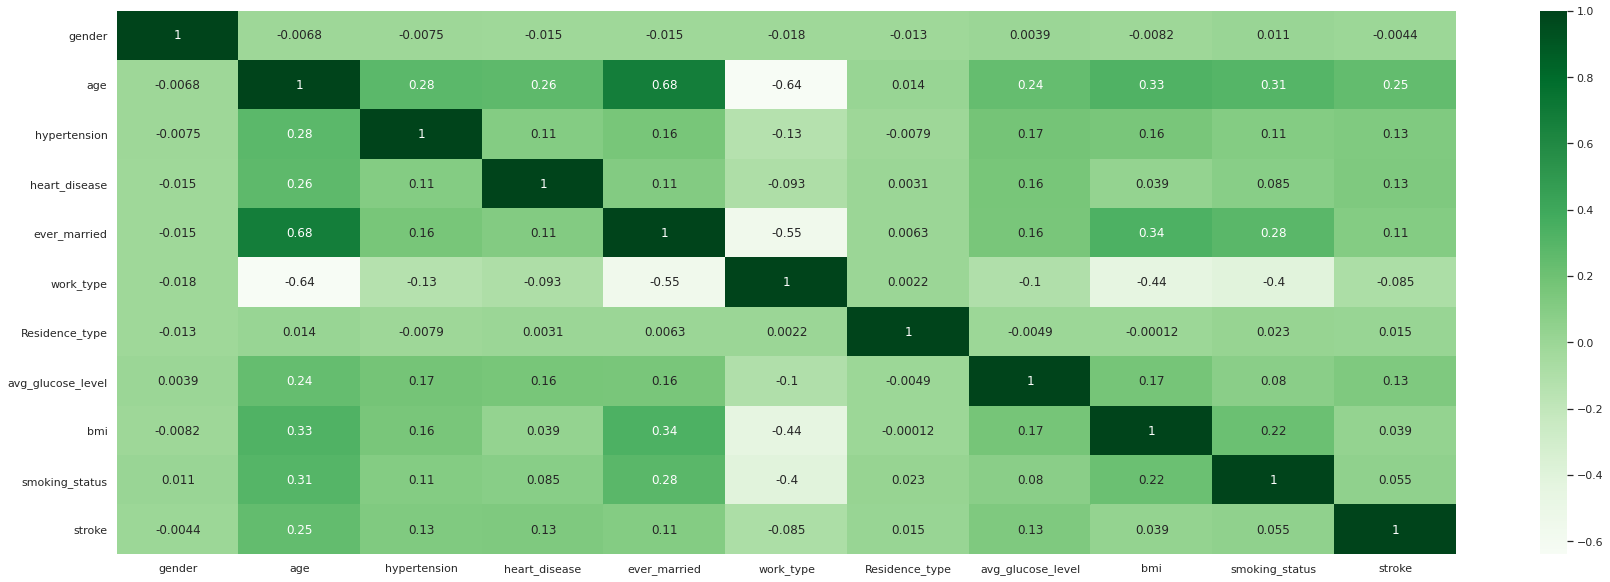

In [115]:
"""correlation plot"""
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Greens')
plt.show()

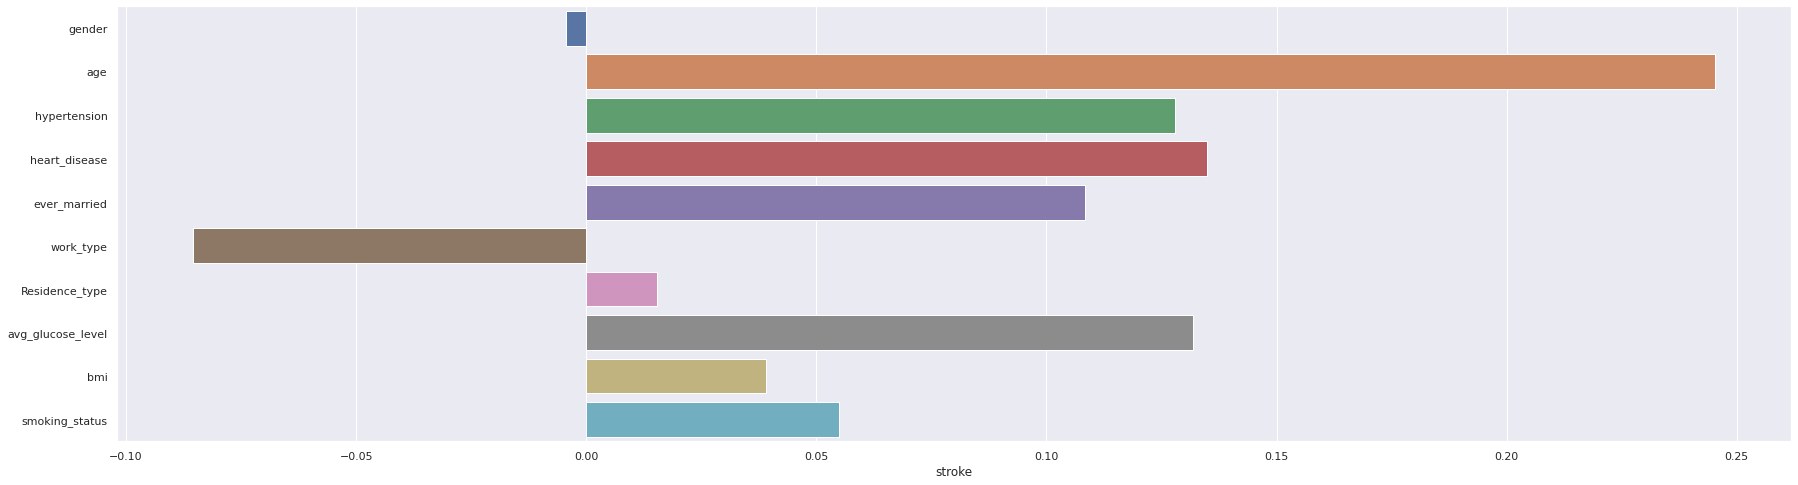

In [116]:
"""correlation against stroke"""
plt.figure(figsize=(30,8))
sns.barplot(y=data.columns.values[:-1],x=data.corr(method='pearson')['stroke'][:-1])
plt.show()

# Generate Data For Modeling

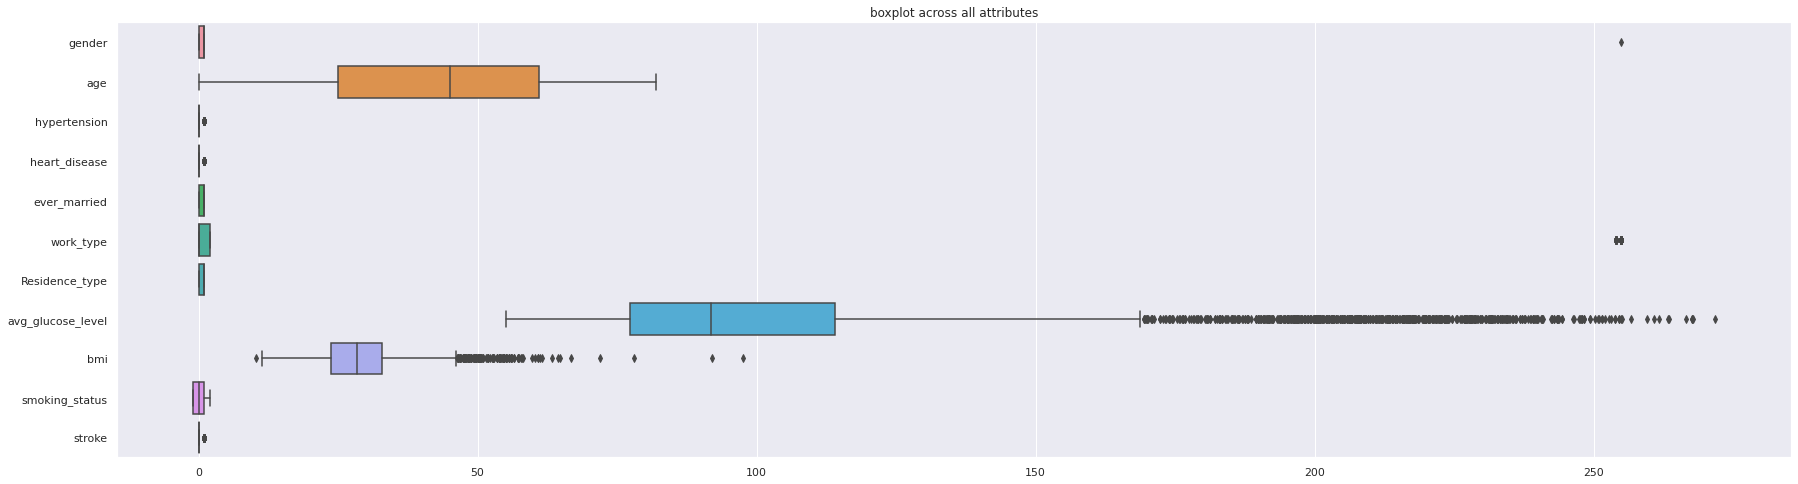

In [117]:
"""check & remove outliers from continuous data"""
plt.figure(figsize=(30,8))
sns.boxplot(data=data,orient='h')
plt.title("boxplot across all attributes")
plt.show()

In [118]:
"""IQR for glucose"""
glucose_Q1 = data['avg_glucose_level'].quantile(0.25)
glucose_Q3 = data['avg_glucose_level'].quantile(0.75)
glucose_IQR = glucose_Q3-glucose_Q1

In [119]:
data = data[~((data['avg_glucose_level']<glucose_Q1) | (data['avg_glucose_level']>glucose_Q3))]
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,0,80.0,0,1,1,0,0,105.92,32.5,0,1
7,1,69.0,0,0,0,0,1,94.39,22.8,0,1
10,1,81.0,1,0,1,0,0,80.43,29.7,0,1
12,1,54.0,0,0,1,0,1,104.51,27.3,2,1
18,1,60.0,0,0,0,0,1,89.22,37.8,0,1


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2555 non-null   uint8  
 1   age                2555 non-null   float64
 2   hypertension       2555 non-null   int64  
 3   heart_disease      2555 non-null   int64  
 4   ever_married       2555 non-null   uint8  
 5   work_type          2555 non-null   uint8  
 6   Residence_type     2555 non-null   uint8  
 7   avg_glucose_level  2555 non-null   float64
 8   bmi                2555 non-null   float64
 9   smoking_status     2555 non-null   int64  
 10  stroke             2555 non-null   int64  
dtypes: float64(3), int64(4), uint8(4)
memory usage: 169.7 KB


In [121]:
"""IQR for bmi"""
bmi_Q1 = data['bmi'].quantile(0.25)
bmi_Q3 = data['bmi'].quantile(0.75)
bmi_IQR = bmi_Q3-bmi_Q1

In [122]:
data = data[~((data['bmi']<bmi_Q1) | (data['bmi']>bmi_Q3))]
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
10,1,81.0,1,0,1,0,0,80.43,29.7,0,1
12,1,54.0,0,0,1,0,1,104.51,27.3,2,1
24,0,71.0,0,0,1,0,1,102.87,27.2,1,1
25,0,80.0,0,0,1,1,0,104.12,23.5,0,1
26,1,65.0,0,0,1,0,0,100.98,28.2,1,1


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 10 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1290 non-null   uint8  
 1   age                1290 non-null   float64
 2   hypertension       1290 non-null   int64  
 3   heart_disease      1290 non-null   int64  
 4   ever_married       1290 non-null   uint8  
 5   work_type          1290 non-null   uint8  
 6   Residence_type     1290 non-null   uint8  
 7   avg_glucose_level  1290 non-null   float64
 8   bmi                1290 non-null   float64
 9   smoking_status     1290 non-null   int64  
 10  stroke             1290 non-null   int64  
dtypes: float64(3), int64(4), uint8(4)
memory usage: 85.7 KB


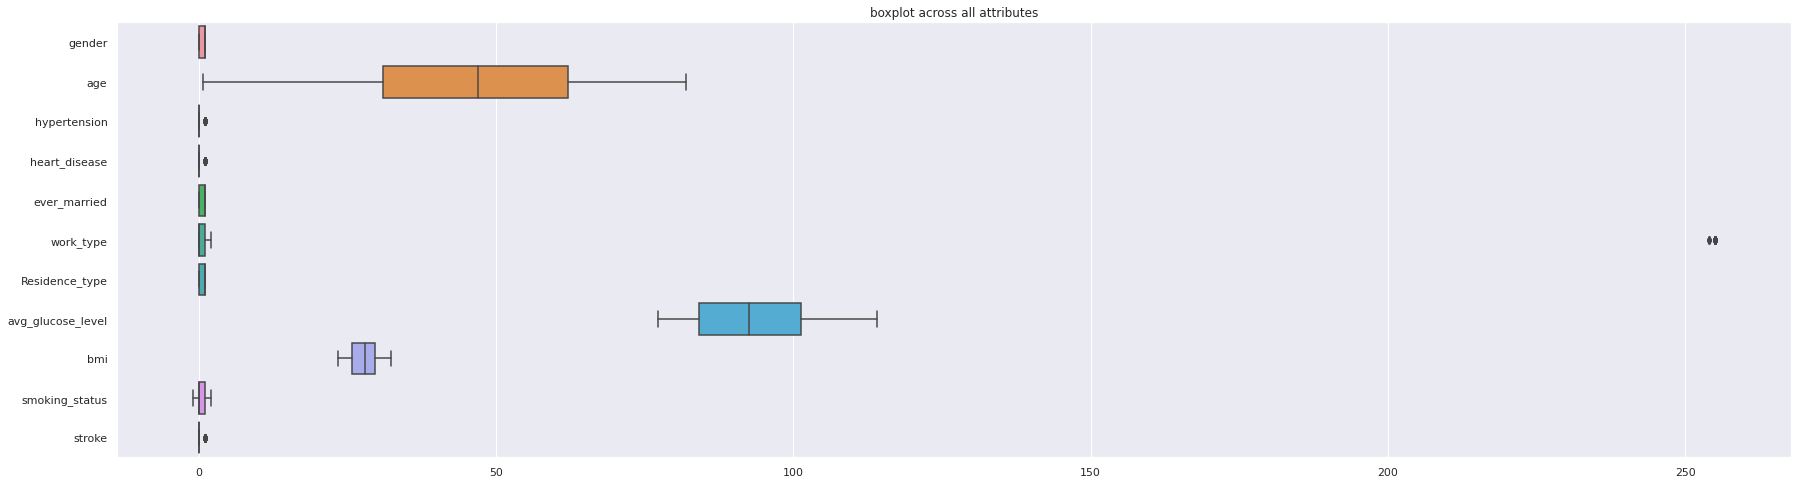

In [124]:
plt.figure(figsize=(30,8))
sns.boxplot(data=data,orient='h')
plt.title("boxplot across all attributes")
plt.show()

In [125]:
label = data.pop('stroke')
train = data

In [128]:
pd.DataFrame(label)

,stroke
10,1
12,1
24,1
25,1
26,1
...,...
5099,0
5101,0
5105,0
5107,0


In [129]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
10,1,81.0,1,0,1,0,0,80.43,29.7,0
12,1,54.0,0,0,1,0,1,104.51,27.3,2
24,0,71.0,0,0,1,0,1,102.87,27.2,1
25,0,80.0,0,0,1,1,0,104.12,23.5,0
26,1,65.0,0,0,1,0,0,100.98,28.2,1


In [130]:
label.to_csv("target.csv")
train.to_csv("train.csv")